In [3]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

data=[]
for i in range(10):
    img = cv2.imread('dataset/%s.jpg' %i)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (threshi, final_img) = cv2.threshold(img_gray, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    data.append(np.array(final_img, dtype=np.float32).flatten())



In [114]:
class SLP():
    def __init__(self):
        self.weights = np.zeros((256, 256))
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    def train(self, x, t):
        linear = x@self.weights
        out = self.sigmoid(linear)
        loss = np.mean(np.sum((out - t)**2))
        grad_out = 2 * (out - t) / len(out)
        grad_sigmoid = (1 - out) * out
        grad_linear = (grad_sigmoid*grad_out)
        grad_weights = np.outer(x, grad_linear)
        self.weights -= 1 * grad_weights
        return self.weights, out, loss
    def predict(self, x):
        linear = x@self.weights
        out = self.sigmoid(linear)
        return out
model = SLP()

In [5]:
def generate_rescaled_inputs(data):
    input_data = []
    
    for i in range(10):
        p = data[i].reshape(16, 16)
        p[p <= 0.5] = 0
        p[p > 0.5] = 1
        input_data.append(p)
        
    return input_data

In [6]:
def generate_predictions(data, m):
    predicted_output = []
    
    for i in range(10):
        if m == 0:
            p = model.predict(data[i])
        else:
            p = model.predict(data[i])
        p = p.reshape(16, 16)
        p[p <= 0.5] = 0
        p[p > 0.5] = 1
        predicted_output.append(p)
    
    return predicted_output

In [7]:
def calculate_total_black_pixels(array):
    count = 0
    for a in array:
            count+= np.count_nonzero(a==0)
    return count

In [8]:
def calculate_total_white_pixels(array):
    count = 0
    for a in array:
            count+= np.count_nonzero(a==1)
    return count

In [9]:
def calculate_matching_black_pixels(data1, data2):
    match_ctr = 0
    inp = data1.flatten()
    pred = data2.flatten()
    for i in range(256):
        match_ctr += 1 if(inp[i]==0 and pred[i]==0) else 0
    return match_ctr

In [10]:
def calculate_mismatching_black_pixels(data1, data2):
    mismatch_ctr = 0
    inp = data1.flatten()
    pred = data2.flatten()
    for i in range(256):
        mismatch_ctr += 1 if(inp[i]==1 and pred[i]==0) else 0
    return mismatch_ctr

In [11]:
def compute_error_metrics(input_data, predicted_output):
    f_h = []
    f_fa = []
    
    for ix, data in enumerate(input_data):
        total_black_pixels = calculate_total_black_pixels(input_data[ix])
        total_hits = calculate_matching_black_pixels(input_data[ix], predicted_output[ix])
        fh_ratio = float(total_hits/total_black_pixels)
        # print("Fraction of hits is ", total_hits, total_black_pixels)
        f_h.append(fh_ratio)
    
    for ix, data in enumerate(input_data):
        total_white_pixels = calculate_total_white_pixels(input_data[ix])
        total_fa = calculate_mismatching_black_pixels(input_data[ix], predicted_output[ix])
        ffa_ratio = float(total_fa/total_white_pixels)
        # print("Fraction of false alarms is ", total_fa, total_white_pixels)
        f_fa.append(ffa_ratio)
    return f_h, f_fa
    

In [12]:
from random import sample
def add_noise(data, sigma):
    idx = sample(range(256), 25)
    noise = np.random.normal(0, sigma, 25)
    for i in range(25):
        data[idx[i]] += noise[i]
    return data
def normalize(data):
    mini = np.amin(data)
    maxi = np.amax(data)
    for i in range(256):
        data[i] = (data[i] - mini)/(maxi - mini)
    return data

In [30]:
noisy_data = []
for d in data:
    nd = add_noise(np.copy(d), 0.1)
    noisy_data.append(normalize(nd))
1/(1+np.exp([1, 0, 0.4, 0.6]))

array([0.26894142, 0.5       , 0.40131234, 0.35434369])

In [116]:
for test in range(1):
    model = SLP()
    
    for epoch in range(1000):
        loss = []
        for x in data:
            w, y, l = model.train(x, x)
            loss += [l]
        print('loss {}'.format(np.mean(loss)))
    
    target_values = generate_rescaled_inputs(data)
    predicted_values = generate_predictions(data, 0)
    fh, ffa = compute_error_metrics(target_values, predicted_values)
    print('ffa=', np.mean(ffa))
    print('fh=', np.mean(fh))

loss 40.27843282736332
loss 22.390334192700838
loss 18.948397366605327
loss 17.51257801805696
loss 16.668347475480743
loss 16.07131998125302
loss 15.6002185805333
loss 15.202172561149894
loss 14.85067401207765
loss 14.53105881795484
loss 14.234601100832545
loss 13.95580693549356
loss 13.691056808829098
loss 13.437874680201793
loss 13.194511335747467
loss 12.959695493736021
loss 12.732479187473247
loss 12.512138496353206
loss 12.29810800533473
loss 12.089936487808666
loss 11.887256317904907
loss 11.689761979997957
loss 11.497194733353053
loss 11.309331518323201
loss 11.125976833074494
loss 10.946956720791677
loss 10.772114275696168
loss 10.601306254757867
loss 10.434400502765204
loss 10.271273981362706
loss 10.111811250406932
loss 9.95590329068983
loss 9.803446586090836
loss 9.654342404116266
loss 9.508496228981997
loss 9.36581731254538
loss 9.22621831664146
loss 9.08961502652922
loss 8.955926119773721
loss 8.825072978386563
loss 8.696979534710838
loss 8.571572143582516
loss 8.448779474

[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

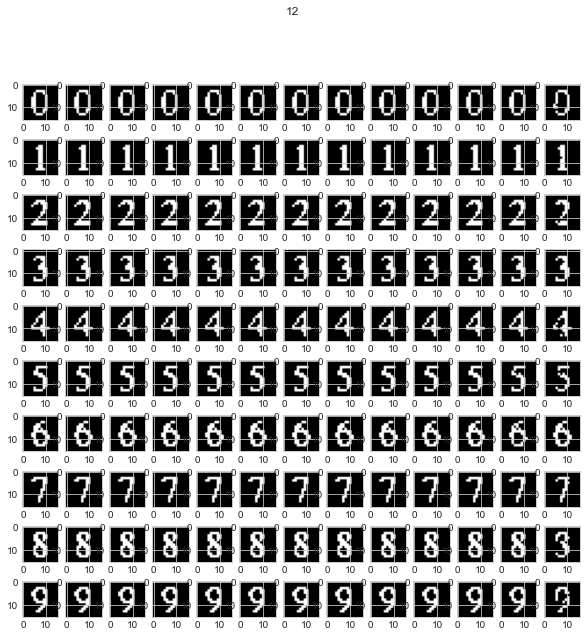

In [117]:
err = []
sigma = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 1]
fig, axs = plt.subplots(10, 13, figsize=(10, 10))
for s in range(13):
    fig.suptitle(s)
    noisy_data = []
    for d in data:
        nd = add_noise(np.copy(d), sigma[s])
        noisy_data.append(normalize(nd))
    target_values = generate_rescaled_inputs(data)
    predicted_values = generate_predictions(noisy_data, 0)
    for i in range(10):
        axs[i, s].imshow(predicted_values[i].reshape(16, 16))
    fh, ffa = compute_error_metrics(target_values, predicted_values)
    err.append([fh, ffa])
print(err)